In [14]:
# injecting error as a sine curve
# two parameters to be experimented with, as errors

# Delta = width of the error (time, x-axis)
# delta = 200

# H = hight of the error (amplitude, y-axis)
# a = 10


Workflow:

* generate error pattern with various Delta & H
* create array of errors
* import base dataset
* create a new dataset by injecting error into base dataset
* feed the new dataset into LSTM algorithm & 
* see the anomay detection response

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Sinewave configuration
# https://github.com/biplabro/LSTM-time-series/blob/master/Error_patterns/Sine-wave.ipynb

# y(t) = a*sin(2*π*f*t + Φ)

# amplitude A
a = 10

# frequency F
f = 0.005

# time period
# datapoint taken every 0.5 sec

# total period 200, positive half cycle 0-100 sec
tP = np.arange(0,100,0.5) # (start, end, interval)

# total period 200, negative half cycle 100-200 sec
tN = np.arange(100,200,0.5) # (start, end, interval)

In [5]:
# x axis data tP and tN
# y axis data yP & yN

# sine curve in positive y axis
yP = a*np.sin(2*np.pi*f*tP)

# sine curve in negative y axis
yN = a*np.sin(2*np.pi*f*tN)

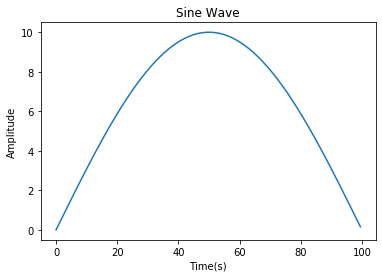

In [7]:
# plot the graph

# Positive cycle
plt.plot(tP,yP) 
plt.title("Sine Wave")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()

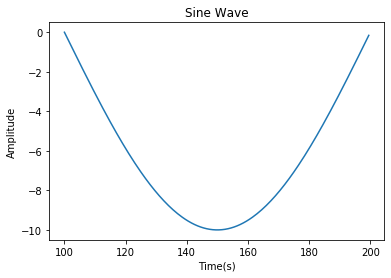

In [10]:
# plot the graph

# Negative cycle
plt.plot(tN,yN) 
plt.title("Sine Wave")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()

In [11]:
# two different arrays are generared to represent two different curves

In [12]:
yP

array([ 0.        ,  0.15707317,  0.31410759,  0.47106451,  0.6279052 ,
        0.78459096,  0.94108313,  1.09734311,  1.25333234,  1.40901232,
        1.56434465,  1.719291  ,  1.87381315,  2.02787295,  2.18143241,
        2.33445364,  2.48689887,  2.6387305 ,  2.78991106,  2.94040325,
        3.09016994,  3.23917418,  3.3873792 ,  3.53474844,  3.68124553,
        3.82683432,  3.97147891,  4.11514359,  4.25779292,  4.3993917 ,
        4.539905  ,  4.67929814,  4.81753674,  4.95458668,  5.09041416,
        5.22498565,  5.35826795,  5.49022818,  5.62083378,  5.75005252,
        5.87785252,  6.00420225,  6.12907054,  6.25242656,  6.3742399 ,
        6.49448048,  6.61311865,  6.73012514,  6.84547106,  6.95912797,
        7.07106781,  7.18126298,  7.28968627,  7.39631095,  7.5011107 ,
        7.60405966,  7.70513243,  7.80430407,  7.90155012,  7.99684658,
        8.09016994,  8.18149717,  8.27080574,  8.35807361,  8.44327926,
        8.52640164,  8.60742027,  8.68631514,  8.7630668 ,  8.83

In [13]:
yN

array([-3.21624530e-15, -1.57073173e-01, -3.14107591e-01, -4.71064507e-01,
       -6.27905195e-01, -7.84590957e-01, -9.41083133e-01, -1.09734311e+00,
       -1.25333234e+00, -1.40901232e+00, -1.56434465e+00, -1.71929100e+00,
       -1.87381315e+00, -2.02787295e+00, -2.18143241e+00, -2.33445364e+00,
       -2.48689887e+00, -2.63873050e+00, -2.78991106e+00, -2.94040325e+00,
       -3.09016994e+00, -3.23917418e+00, -3.38737920e+00, -3.53474844e+00,
       -3.68124553e+00, -3.82683432e+00, -3.97147891e+00, -4.11514359e+00,
       -4.25779292e+00, -4.39939170e+00, -4.53990500e+00, -4.67929814e+00,
       -4.81753674e+00, -4.95458668e+00, -5.09041416e+00, -5.22498565e+00,
       -5.35826795e+00, -5.49022818e+00, -5.62083378e+00, -5.75005252e+00,
       -5.87785252e+00, -6.00420225e+00, -6.12907054e+00, -6.25242656e+00,
       -6.37423990e+00, -6.49448048e+00, -6.61311865e+00, -6.73012514e+00,
       -6.84547106e+00, -6.95912797e+00, -7.07106781e+00, -7.18126298e+00,
       -7.28968627e+00, -

In [19]:
# import required libraries
import pandas as pd

In [20]:
# import base dataset
df = pd.read_csv('normal_ev_8600_datapoints.csv')

# show stock table, default value top 6 rows, heading + 0-4 
df.head()

,data_point,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,1,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,2,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,3,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,4,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,5,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [29]:
# insert errors at 
# column = stator_winding; row = 7300 & 8100
df.iloc[7600,4]=yP


ValueError: Must have equal len keys and value when setting with an iterable

In [ ]:
# References
# https://stackoverflow.com/questions/43772362/how-to-print-a-specific-row-of-a-pandas-dataframe
# 
# 
# 
